# ANOVA, MANOVA AND/OR KRUSKAL_WALLACE

This notebook walks through the steps of testing the assumptions and then conducting:

- MANOVA
- ANOVA
- KRUSKAL-WALLACE

## Assumptions

Both MANOVA and ANOVA require the data be normally distributed. To determine if our dataset is normally distributed we will:

1. Obtain Summary Statistics
2. Graph the dataset
3. Measure Skewness and Kurtosis
4. Transformation (if necessary)
5. Chi Squares goodness of fit (fit to normal distribution)

### Loading the data

In [201]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
from statsmodels.graphics.gofplots import qqplot
from cleanup import cleanREF as cref

In [178]:
df_o = pd.read_csv('./EmbaymentData_Basic1.csv', header=0)
df = df_o
df.head()

,Embayment,Descriptor,Type 1,Type 2,P Lat,P Long,Lm,Lb,C
0,Tamiahua Lagoon,Lagoon,Barrier Estuary,Lagoon,"21°34'46.90""N","97°32'50.12""W",135,20346,0.006635211
1,Lagoon of Caratasca,Lagoon,Barrier Estuary,NaN,"15°21'21.71""N","83°50'7.78""W",562,50805,0.011061903
2,Lake Illawarra,Lake,Barrier Estuary,COAST. PLAIN,"34°31'21.44""S","150°50'18.66""E",414,8609,0.048089209
3,Pensacola Bay,Bay,Barrier Estuary,NaN,"30°25'53.17""N","87° 7'0.43""W",1613,31981,0.050436196
4,San Diego Bay,Bay,Barrier Estuary,NaN,"32°40'31.64""N","117° 8'39.01""W",1422,17172,0.082809224


In [179]:
df.dtypes

Embayment     object
Descriptor    object
Type 1        object
Type 2        object
P Lat         object
P Long        object
Lm             int64
Lb             int64
C             object
dtype: object

***In the above, C is listed as an object (factor in R), however this should be stored as a float. We will convert it to a float.***

In [180]:
df = df[df.loc[:,'C'].str.contains('#REF')==False]
if df.loc[:,'C'].dtype is not float:
    df.loc[:,'C'] = df.loc[:,'C'].astype(float)

# Summary Statistics and Basic Histogram

In [181]:
df.describe()

,Lm,Lb,C
count,108.000000,108.000000,108.000000
mean,16037.518519,28705.351852,0.567908
std,18544.529801,22834.805629,0.498723
min,135.000000,2605.000000,0.006635
25%,2550.250000,12320.000000,0.154916
50%,8373.000000,22339.500000,0.415416
75%,23876.000000,40376.500000,0.896912
max,80096.000000,120752.000000,2.609228


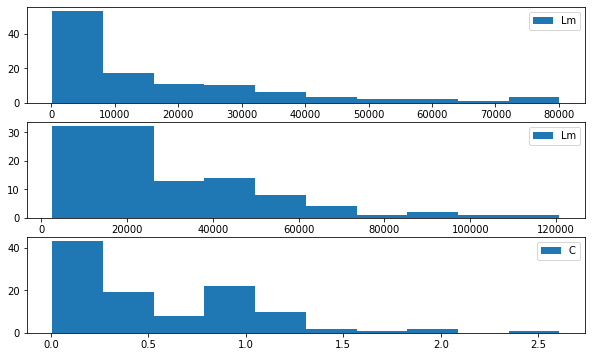

In [184]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.hist(df['Lm'], label='Lm')
ax1.legend()

ax2.hist(df['Lb'], label='Lm')
ax2.legend()

ax3.hist(df['C'], label = 'C')
ax3.legend()

plt.show()

# Skewness and Kurtosis

Now that we have observed these graphically it is time to measure skewness and kurtosis.

In [185]:
skew = stats.skew(df.loc[:, ( 'Lm', 'Lb', 'C')])
skew

array([1.62707357, 1.4641885 , 1.21917356])

In [186]:
kurt = stats.kurtosis(df.loc[:, ('Lm', 'Lb', 'C')])
kurt

array([2.23731933, 2.26856731, 1.86164852])

# Transformation

The data is right-tailed, so we will perform a log transformation and then reassess normality.

In [190]:
dft = df.loc[:, ('Embayment', 'Type 1', 'Lm', 'Lb', 'C')]

In [191]:
dft['Lm'] = dft['Lm'].apply(math.log)
dft['Lb'] = dft['Lb'].apply(math.log)
dft['C'] = dft['C'].apply(math.log)

In [193]:
dft.describe()

,Lm,Lb,C
count,108.000000,108.000000,108.000000
mean,8.877459,9.952202,-1.074743
std,1.458685,0.833088,1.174866
min,4.905275,7.865188,-5.015365
25%,7.838837,9.418976,-1.864907
50%,9.032767,10.013649,-0.879025
75%,10.080278,10.605985,-0.109080
max,11.290981,11.701494,0.959055


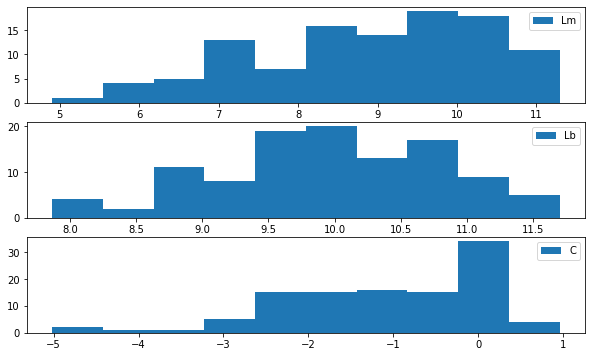

In [195]:
fig, (ax1 , ax2, ax3) = plt.subplots(3)

ax1.hist(dft['Lm'], label = 'Lm')
ax2.hist(dft['Lb'], label = 'Lb')
ax3.hist(dft['C'], label = 'C')
ax1.legend()
ax2.legend()
ax3.legend()

plt.show()


In [197]:
tskew = stats.skew(dft.loc[:,('Lm', 'Lb', 'C')] )
tskew

array([-0.40410378, -0.26270987, -0.77535762])

In [202]:
tkurt = stats.skew(dft.loc[:, ('Lm', 'Lb', 'C')])
tkurt

array([-0.40410378, -0.26270987, -0.77535762])

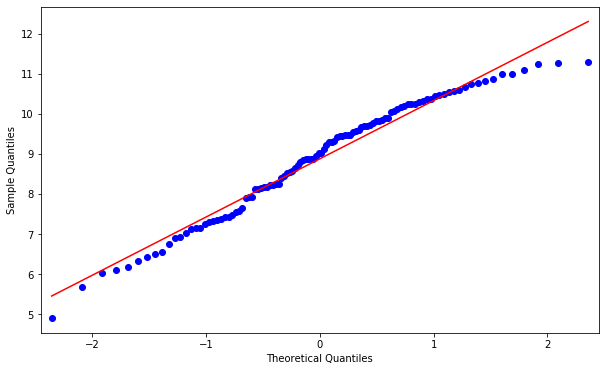

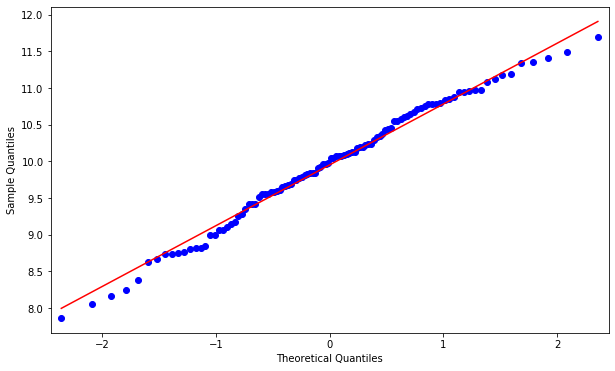

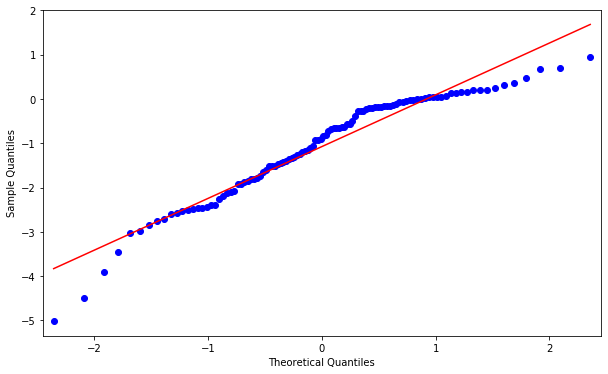

In [214]:


qqplot(dft.loc[:,'Lm'], line='s')
qqplot(dft.loc[:,'Lb'], line='s')
qqplot(dft.loc[:,'C'], line='s')

plt.show()



# Chi Squared ($\chi^2$) Goodness of Fit

The $\chi^2$ goodness of fit is used to determine how well the data fit a normal distribution. Note that a p < 0.05 means that the compared distributions ARE different. In this case comparing the sample distribution to the normal distribution.

In [215]:
chi2 = stats.chisquare(dft.loc[:,('Lm', 'Lb', 'C')])
chi2

Power_divergenceResult(statistic=array([  25.64591728,    7.46183857, -137.42185887]), pvalue=array([1., 1., 1.]))

# MANOVA and Post Hoc

Here we will conduct a MANOVA for  Coastal Feature Class ('Type 1') and compare the variables L<sub>m</sub>, L<sub>b</sub>, and C.

At this stage it is faster and safe to run MANOVA in R which I will do.

In [216]:
dft.to_csv('./DataOutput/LogTidyData.csv')